# EBOLA VIRUS SIR ANALYSIS AND VISUALIZATION

In [13]:
using Plots 
gr()
using DelimitedFiles

# now lets get the total cases data from wikipedia as source
EVDdata            = DelimitedFiles.readdlm("wikipediaEVDdatesconverted.csv", ',')
tvalsfromdata      = EVDdata[:,1]  # the epidemic day values
totalcasesfromdata = EVDdata[:, 2]    # we'll extract individual countries when we need them

#  function that drive the change that happen every time step
function updateSIR(popnvector)
    susceptibles = popnvector[1];
    infecteds    = popnvector[2]; 
    removeds     = popnvector[3];
    newS = susceptibles - lambda*susceptibles*infecteds*dt
    newI = infecteds + lambda*susceptibles*infecteds*dt - gam*infecteds*dt  
    newR = removeds + gam*infecteds*dt
    return [newS newI newR] 
end




updateSIR (generic function with 1 method)

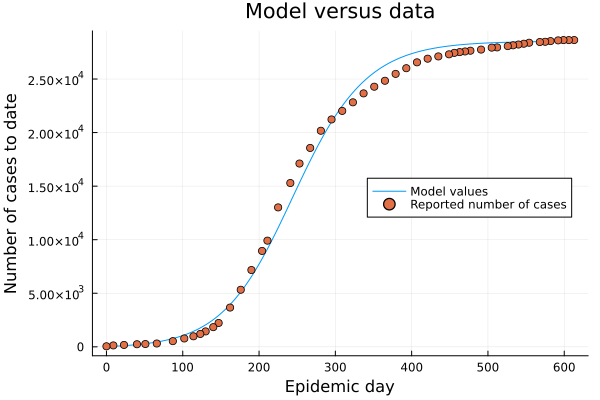

In [29]:
# set parameter values
lambda = 1.47*10^-6.   # infection rate parameter
gam = 0.125      # recovery rate parameter 
dt = 0.5         # length of time step in days
tfinal = 610.;   
s0 = 1.0*10^5.
i0 = 20         
r0 = 0.     
nsteps = round(Int64, tfinal/dt)
resultvals = Array{Float64}(undef, nsteps+1, 3) 
timevec = Array{Float64}(undef, nsteps+1)        
resultvals[1,:] = [s0, i0, r0]
timevec[1] = 0.             


for step  = 1:nsteps
    resultvals[step+1, :] = updateSIR(resultvals[step, :]) 
    timevec[step+1] = timevec[step] + dt
end
ivals = resultvals[:, 2]
rvals = resultvals[:, 3]
cvals = ivals + rvals   
plot(timevec, cvals,       # first the model's output s plotted as a line
label = "Model values",
xlabel = "Epidemic day",
ylabel = "Number of cases to date",
title = "Model versus data")

plot!(tvalsfromdata, totalcasesfromdata,
legend = :right,
line = :scatter,
label = "Reported number of cases")